In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


There are some columns which I think does not contributing to target so need to remove.

In [4]:
df.drop('ID', axis=1, inplace=True)

In [5]:
df. drop('contact', axis=1, inplace=True)

In [6]:
df.drop('poutcome', axis=1, inplace=True)

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed
0,56,admin.,married,unknown,no,1933,no,no,19,nov,44,2,-1,0,no
1,31,unknown,married,secondary,no,3,no,no,20,jul,91,2,-1,0,no
2,27,services,married,secondary,no,891,yes,no,18,jul,240,1,-1,0,no
3,57,management,divorced,tertiary,no,3287,no,no,22,jun,867,1,84,3,yes
4,31,technician,married,secondary,no,119,yes,no,4,feb,380,1,-1,0,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   day         31647 non-null  int64 
 9   month       31647 non-null  object
 10  duration    31647 non-null  int64 
 11  campaign    31647 non-null  int64 
 12  pdays       31647 non-null  int64 
 13  previous    31647 non-null  int64 
 14  subscribed  31647 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


Thear are 31647 & 15 columns data available in this dataset.

In [9]:
for i in df.columns:
    print(df[i].value_counts(), "\n")

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64 

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64 

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64 

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64 

no     31062
yes      585
Name: default, dtype: int64 

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64 

yes    17584
no     14063
Name: housing, dtype: int64 

no     26516
yes     5131
Name: loan, 

There are unknown values present in Education and Job columns and need to address

In [10]:
for i in df.columns:
    df[i].replace('unknown', np.nan, inplace=True, regex=True)

In [11]:
df['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
Name: education, dtype: int64

In [12]:
df['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
Name: job, dtype: int64

In [13]:
df.isnull().sum()

age              0
job            206
marital          0
education     1314
default          0
balance          0
housing          0
loan             0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
subscribed       0
dtype: int64

After replacing unknown value to null value. Now I am filling null values

In [14]:
df['education']=df['education'].fillna(df['education'].mode()[0])

In [15]:
df['job']=df['job'].fillna(df['job'].mode()[0])

In [16]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
subscribed    0
dtype: int64

Now null values are filled by mode technique.

In [17]:
df.shape

(31647, 15)

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
col=['marital','job','education','default','housing','loan','month']

In [86]:
for i in col:
    df1=le.fit_transform(df[i])
    df[i]=df1

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed
0,56,0,1,1,0,1933,0,0,19,9,44,2,-1,0,no
1,31,1,1,1,0,3,0,0,20,5,91,2,-1,0,no
2,27,7,1,1,0,891,1,0,18,5,240,1,-1,0,no
3,57,4,0,2,0,3287,0,0,22,6,867,1,84,3,yes
4,31,9,1,1,0,119,1,0,4,3,380,1,-1,0,no


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  int32 
 2   marital     31647 non-null  int32 
 3   education   31647 non-null  int32 
 4   default     31647 non-null  int32 
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  int32 
 7   loan        31647 non-null  int32 
 8   day         31647 non-null  int64 
 9   month       31647 non-null  int32 
 10  duration    31647 non-null  int64 
 11  campaign    31647 non-null  int64 
 12  pdays       31647 non-null  int64 
 13  previous    31647 non-null  int64 
 14  subscribed  31647 non-null  object
dtypes: int32(7), int64(7), object(1)
memory usage: 2.8+ MB


All string columns now converted into integer

In [23]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.267829,1.167220,1.141972,0.018485,1363.890258,0.555629,0.162132,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272
std,10.625134,3.237877,0.607186,0.652443,0.134700,3028.304293,0.496904,0.368578,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000


There are some outliers present in this dataset thant need to be resolved. In 'balance', 'loan', 'duration', ' campaign' & 'pdays' columns std. division is not proper. Values in dataset are same, means there is no null values.

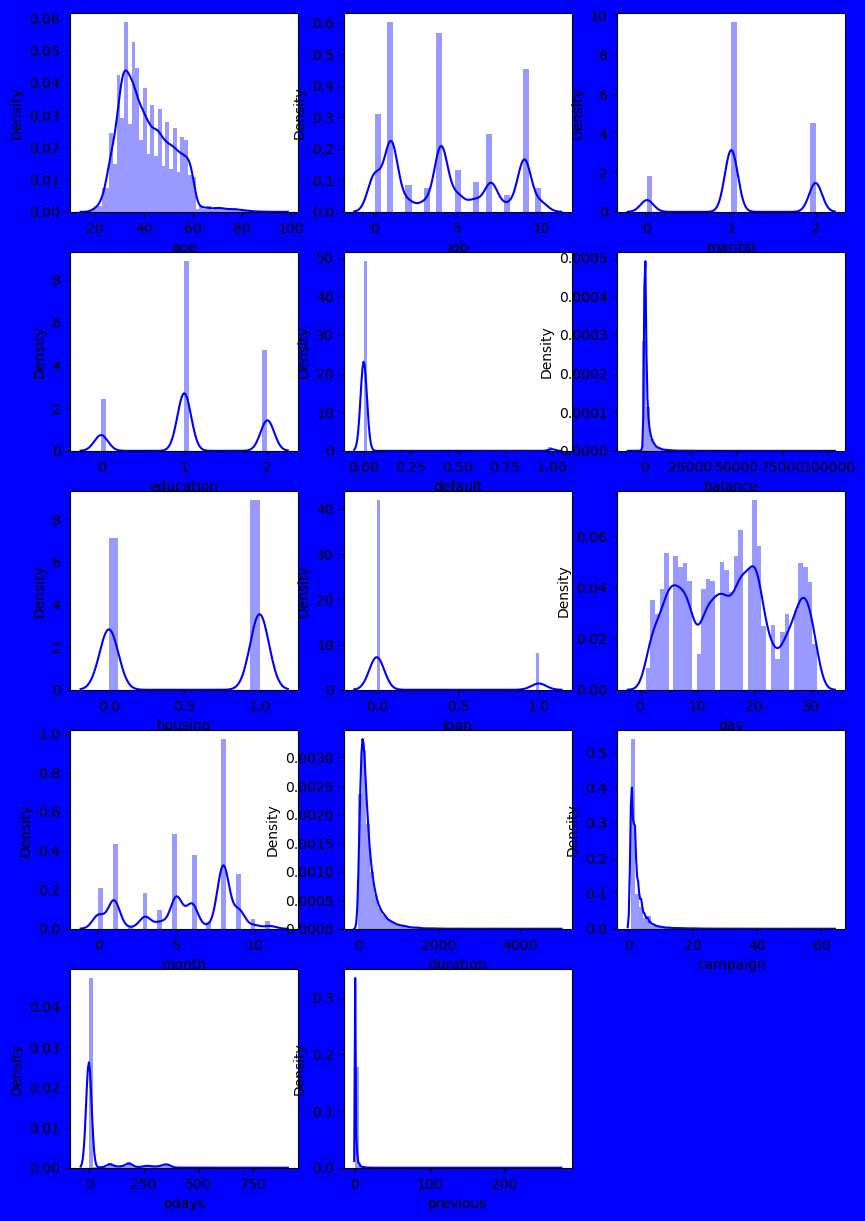

In [24]:
plt.figure(figsize=(10,15), facecolor='blue')
plotnumber=1

for i in df:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

There are some outliers present in some columns so need to check it again in box plot.

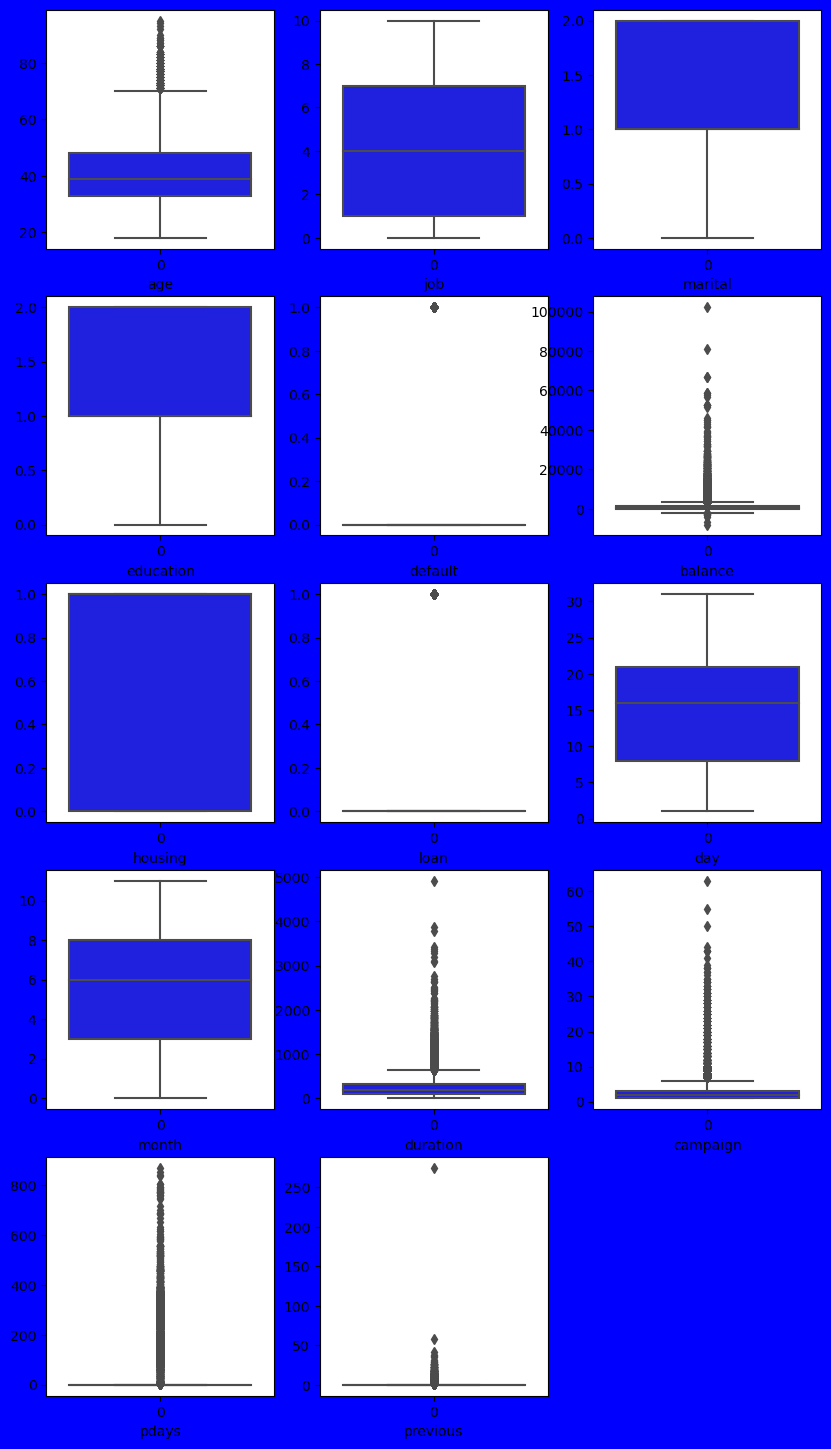

In [25]:
plt.figure(figsize=(10,18), facecolor='blue')
plotnumber=1

for i in df:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

There are ouliers in age, balance, duration, campaign, pdays & previous columns

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed
0,56,0,1,1,0,1933,0,0,19,9,44,2,-1,0,no
1,31,1,1,1,0,3,0,0,20,5,91,2,-1,0,no
2,27,7,1,1,0,891,1,0,18,5,240,1,-1,0,no
3,57,4,0,2,0,3287,0,0,22,6,867,1,84,3,yes
4,31,9,1,1,0,119,1,0,4,3,380,1,-1,0,no


In [23]:
from scipy.stats import zscore

In [24]:
z_score=zscore(df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])

In [25]:
abs_z_score=np.abs(z_score)

In [26]:
filter_entry=(abs_z_score<3).all(axis=1)

In [27]:
df=df[filter_entry]

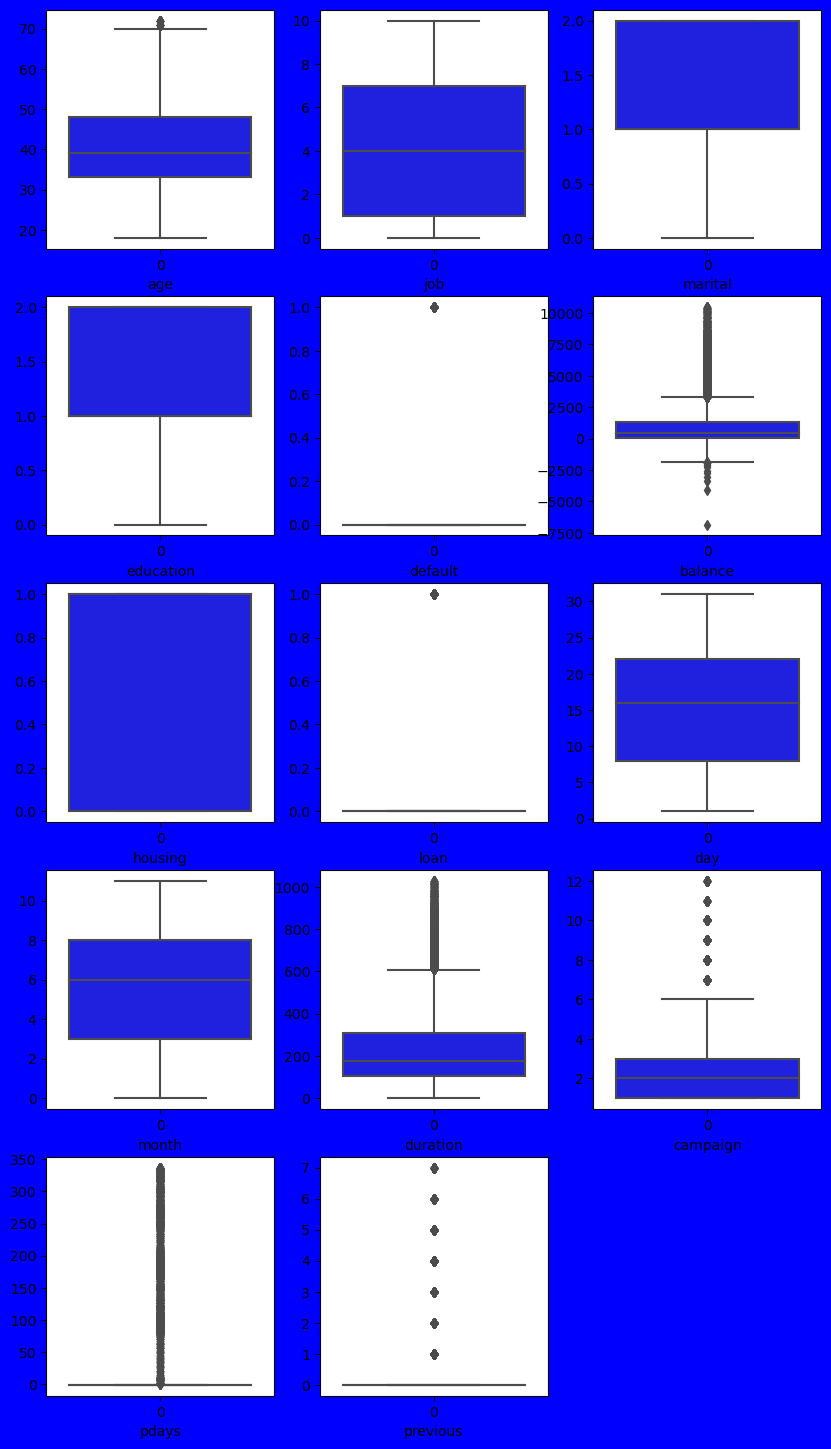

In [28]:
plt.figure(figsize=(10,18), facecolor='blue')
plotnumber=1

for i in df:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

I have tried to remvoe some outlier form the dataset. But still there are some ouliers still presents. 

In [29]:
#Now I will check Multicollinearity issue in independend variables
df_corr=df.corr().abs()

<Axes: >

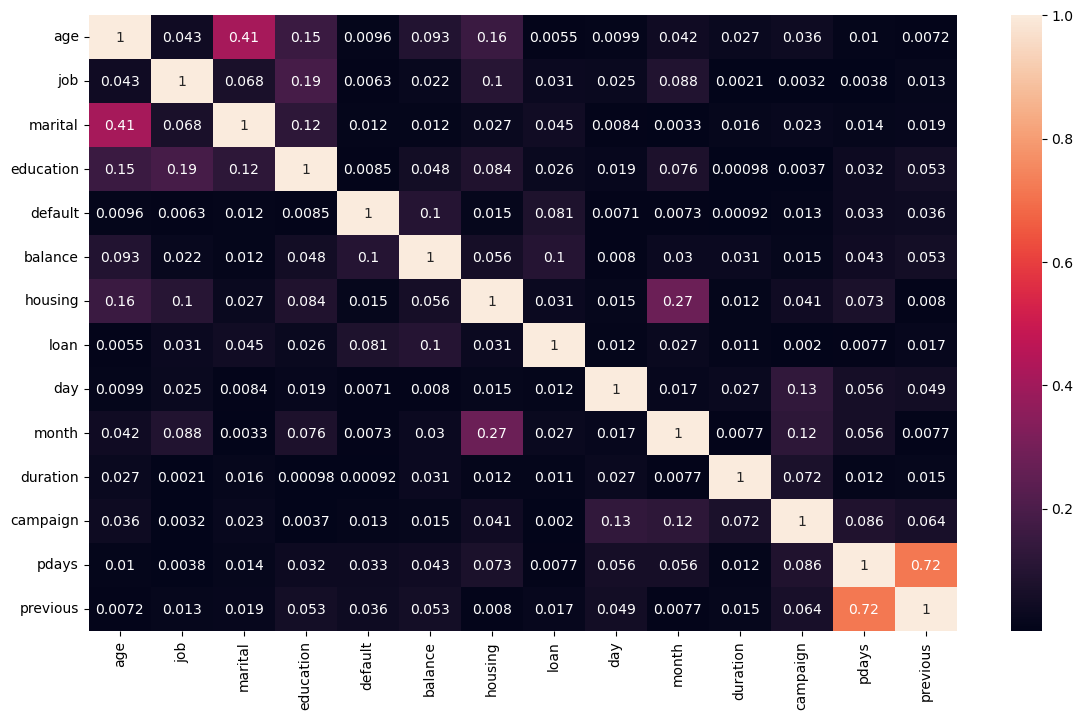

In [30]:
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})

In heat mape I am not able to find any multicollinearity issue. Now I will check VIF to see the multicollinearity issue

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop('subscribed',axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x, i) for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,8.245231,age
1,2.795752,job
2,4.116281,marital
3,4.010020,education
4,1.036524,default
5,1.455318,balance
6,2.393498,housing
7,1.216931,loan
8,4.411657,day
9,4.598671,month


'Age' feture is highly correlated with other features so need to drop

In [32]:
df=df.drop('age', axis=1)

In [33]:
df['subscribed']=df['subscribed'].map({'no':0, 'yes':1})

0    25264
1     2860
Name: subscribed, dtype: int64


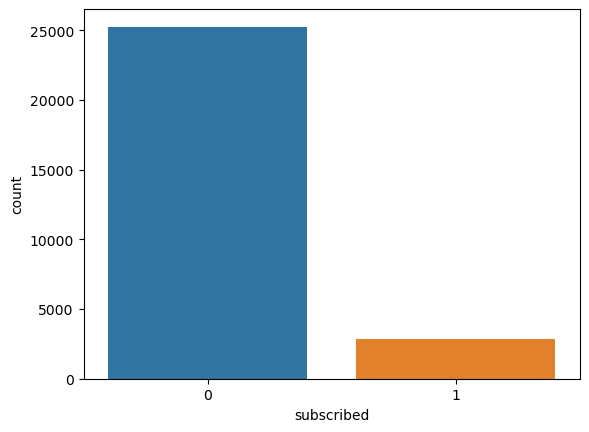

In [34]:
ax=sns.countplot(x='subscribed', data=df)
print(df['subscribed'].value_counts())

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [36]:
Counter(df['subscribed'])

Counter({0: 25264, 1: 2860})

There is imbalanced data in 'subscribed' column and need to balance the diffrence by applying SMOTE technique

In [37]:
x=df.drop('subscribed', axis=1)
y=df.subscribed

In [38]:
scaled=StandardScaler()
x_scale=scaled.fit_transform(x)

In [39]:
ove_smp=SMOTE(random_state=55,k_neighbors=3, sampling_strategy=0.80)

In [40]:
x1, y1=ove_smp.fit_resample(x_scale,y)

In [41]:
print('The number of classes before fit {}'.format(Counter(y)))
print('The number of classes after fit {}'.format(Counter(y1)))

The number of classes before fit Counter({0: 25264, 1: 2860})
The number of classes after fit Counter({0: 25264, 1: 20211})


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [43]:
mac=0
mrs=0

for i in range(1, 300):
    x_train, x_test, y_train, y_test=train_test_split(x1,y1, test_size=0.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>mac:
        mac=acc
        mrs=i
print("Best Accuracy score is :", mac*100, "at Random_state :", mrs)

Best Accuracy score is : 94.9937696987466 at Random_state : 282


In [44]:
 x_train, x_test, y_train, y_test=train_test_split(x_scale, y, test_size=0.30, random_state=i)

In [45]:
def metric_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n===============================train result==============')
        print(f'Accuracy Score:{accuracy_score(y_train,y_pred)*100:2f}%')
           
    elif train==False:
        ypred=clf.predict(x_test)
        
        print('\n===============================test result==============')
        print(f'Accuracy Score:{accuracy_score(y_test,ypred)*100:2f}%')
            
        print("\n\nTest Classification Report\n", classification_report(y_test,ypred, digits=2))

In [72]:
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()

In [47]:
models={'RandomForestClassifier':rfc,'ExtraTreesClassifier':etc,'LogisticRegression':lr,'KNeighborsClassifier':knn,'DecisionTreeClassifier':dtc,'GradientBoostingClassifier':gbc,'AdaBoostClassifier':abc,'BaggingClassifier':bc}

In [48]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print('Model Name :', name)
    metric_score(model,x_train, x_test, y_train, y_test, train=True)
    metric_score(model,x_train, x_test, y_train, y_test, train=False)
    print('\n')

Model Name : RandomForestClassifier

===============================train result==============
Accuracy Score:100.000000%

===============================test result==============
Accuracy Score:90.886466%


Test Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7575
           1       0.60      0.31      0.41       863

    accuracy                           0.91      8438
   macro avg       0.77      0.65      0.68      8438
weighted avg       0.89      0.91      0.90      8438



Model Name : ExtraTreesClassifier

===============================train result==============
Accuracy Score:100.000000%

===============================test result==============
Accuracy Score:90.720550%


Test Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7575
           1       0.61      0.26      0.37       863

    accuracy                         

In [66]:
mdl=[rfc,etc,lr,knn,dtc,gbc,abc,bc]

In [50]:
#Cheking CV Score by using for loop on all models.
for i in mdl:
    score=cross_val_score(i, x1,y1)
    print('Model Name is :', i)
    print('Score: ',score)
    print('Score Mean: ',score.mean())
    for name, model in models.items():
        model.fit(x_train, y_train)
        ypred=model.predict(x_test)
    print("diffrent Between Accuracy Score and CV score is :" ,accuracy_score(y_test, ypred)-(score.mean()))
    print("\n")

Model Name is : RandomForestClassifier()
Score:  [0.87718527 0.9579989  0.96030786 0.96448598 0.95623969]
Score Mean:  0.9432435404068169
diffrent Between Accuracy Score and CV score is : -0.04172659326294392


Model Name is : ExtraTreesClassifier()
Score:  [0.94546454 0.96360638 0.96591534 0.96437603 0.96118747]
Score Mean:  0.9601099505222649
diffrent Between Accuracy Score and CV score is : -0.05705235393539598


Model Name is : LogisticRegression()
Score:  [0.78339747 0.78812534 0.78669599 0.79406267 0.79175371]
Score Mean:  0.7888070368334249
diffrent Between Accuracy Score and CV score is : 0.11342097928413852


Model Name is : KNeighborsClassifier()
Score:  [0.89829577 0.90159428 0.9048928  0.90170423 0.9042331 ]
Score Mean:  0.9021440351841672
diffrent Between Accuracy Score and CV score is : -0.0018122029964450226


Model Name is : DecisionTreeClassifier()
Score:  [0.82166025 0.92116548 0.92182518 0.92226498 0.92094557]
Score Mean:  0.9015722924683892
diffrent Between Accuracy

Above score shows that best model is ExtraTreesClassifier. Now I will try to tune the model by using GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid_param={'criterion':['gini','entropy'],
      'random_state':[10,50],
      'max_depth':[0,20,35],
      'n_jobs':[-2,-1,1],
      'n_estimators':[10,55,150]}

In [53]:
gcv=GridSearchCV(ExtraTreesClassifier(),grid_param,cv=5)

In [54]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 20, 35],
                         'n_estimators': [10, 55, 150], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50]})

In [55]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 150,
 'n_jobs': -1,
 'random_state': 10}

In [76]:
final_model=ExtraTreesClassifier(criterion='gini', max_depth=20,n_estimators=150,n_jobs=-1, random_state=10)

In [77]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
accuracy_score(y_test, pred)

0.9080350794027021

After tunning parameters I got 90% accuracy score.

In [97]:
dftest=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [98]:
dftest.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [99]:
#Removing unwanted features from dataset
dftest.drop('ID', axis=1, inplace=True)
dftest.drop('contact', axis=1, inplace=True)
dftest.drop('poutcome', axis=1, inplace=True)

In [100]:
dftest.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,32,services,married,secondary,no,118,yes,no,15,may,20,6,-1,0
1,78,retired,divorced,primary,no,2787,no,no,1,jul,372,1,-1,0
2,31,self-employed,single,tertiary,no,144,yes,no,16,may,676,1,-1,0
3,57,services,single,primary,no,3777,yes,no,13,may,65,2,-1,0
4,45,blue-collar,divorced,secondary,no,-705,no,yes,3,jul,111,1,-1,0


In [101]:
for i in dftest.columns:
    print(dftest[i].value_counts(), "\n")

32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64 

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64 

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64 

secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64 

no     13334
yes      230
Name: default, dtype: int64 

 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: balance, Length: 4292, dtype: int64 

yes    7546
no     6018
Name: housing, dtype: int64 

no     11451
yes     2113
Name: loan, dtype: int64 

20    843
18    

In [102]:
for i in dftest.columns:
    dftest[i].replace('unknown', np.nan, inplace=True, regex=True)

In [103]:
dftest['education']=dftest['education'].fillna(dftest['education'].mode()[0])
dftest['job']=dftest['job'].fillna(dftest['job'].mode()[0])

In [104]:
dftest.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64

In [105]:
dftest.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,32,services,married,secondary,no,118,yes,no,15,may,20,6,-1,0
1,78,retired,divorced,primary,no,2787,no,no,1,jul,372,1,-1,0
2,31,self-employed,single,tertiary,no,144,yes,no,16,may,676,1,-1,0
3,57,services,single,primary,no,3777,yes,no,13,may,65,2,-1,0
4,45,blue-collar,divorced,secondary,no,-705,no,yes,3,jul,111,1,-1,0


In [106]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [93]:
col_1=['marital','job','education','default','housing','loan','month']

In [107]:
for i in col_1:
    data=le.fit_transform(dftest[i])
    dftest[i]=data

In [115]:
dftest.head()

,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,7,1,1,0,118,1,0,15,8,20,6,-1,0
1,5,0,0,0,2787,0,0,1,5,372,1,-1,0
2,6,2,2,0,144,1,0,16,8,676,1,-1,0
3,7,2,0,0,3777,1,0,13,8,65,2,-1,0
4,1,0,1,0,-705,0,1,3,5,111,1,-1,0


In [110]:
dftest=dftest.drop('age', axis=1)

In [112]:
testpred=final_model.predict(dftest)

In [118]:
report=pd.DataFrame(testpred)

In [119]:
report

,0
0,0
1,0
2,0
3,0
4,1
...,...
13559,0
13560,0
13561,0
13562,0
